# Классификация заемщиков линейными моделями

## курс "Машинное обучение 1", программа AIMasters, 2022

### Некоторые полезные советы
1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль knn, можно добавить ячейку с таким содержимым:
```python
%load_ext autoreload
%autoreload 2
```


2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `modules` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:
```text
tree
    ---modules
    ------__init__.py
    ------linear_model.py
    ------losses.py
    ------utils.py
    ------tests.py
    HW2_*.ipynb
```

## Теоретическая часть (1 балл)
Выведите формулу градиента функции потерь (по параметру $w$) для задачи бинарной логистической регрессии. <br>
Считайте для удобства, что $x[0] = 1$ для любого объекта, то есть $w[0] - \texttt{это bias}$. <br>
Так, в выведенном вами градиенте, $\texttt{grad}[1:]$ - градиент по весам, $\texttt{grad}[0]$ - градиент по $\texttt{bias}$.

$$L(a(x), y) = \log(1 + \exp(-y\langle w, x\rangle)), \quad y \in \{-1, 1\}$$

Запишите вывод градиента ниже.

- $\dfrac{\partial L}{\partial w}=\dfrac{\exp(-y\langle w, x\rangle)\cdot (-yx)}{1 + \exp(-y\langle w, x\rangle)}=\dfrac{-y}{1+ \exp(y\langle w, x\rangle)}x$  

## Реализация алгоритмов (4 баллов)
Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить все
тесты. Задание, не проходящее все тесты, приравнивается к невыполненному. 


При написании необходимо пользоваться стандартными средствами языка Python, библиотеками `numpy, scipy и matplotlib`. Библиотекой `scikit-learn` для реализации модели пользоваться запрещается, но разрешается использовать её в процессе экспериментов. Все
подробности реализации алгоритмов подробно описаны в спецификации к заданию.


Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые тесты, которые находятся в модуле `modules`. Чтобы запустить тесты в консоли требуется выполнить команду:
```c
$ pytest ./modules/tests.py

```

Разрешается дополнять файл тестами для самопроверки. Доп баллы за написание своих тестов не будет :)

## Эксперименты (10 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [1]:
import numpy as np, pandas as pd

%load_ext autoreload
%autoreload 2

# %load_ext - https://ipython.readthedocs.io/en/stable/interactive/magics.html
# %autoreload - https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

data = pd.read_csv('data/application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

data.head(3)


target value_counts:


-1    282686
 1     24825
Name: target, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
np.random.seed(911)

test_size = int(0.2 * data.shape[0]) #*! почему 0.2?
val_size = int(0.3 * (data.shape[0] - test_size)) #*! почему 0.3?
test_idx = np.random.choice(data.shape[0], size=test_size, replace=False)

val_idx_candidates = np.setdiff1d(np.arange(data.shape[0]), test_idx)
val_idx = np.random.choice(val_idx_candidates, size=val_size, replace=False)

data_dict = dict()
data_dict['tst'] = data.loc[test_idx].reset_index(drop=True)
data_dict['val'] = data.loc[val_idx].reset_index(drop=True)

not_train_idx = np.union1d(test_idx, val_idx)
data_dict['tr'] = data.drop(index=not_train_idx)
data_dict['tr'].reset_index(drop=True, inplace=True)

for key, df in data_dict.items():
  print(key, 'shape:', df.shape)

tst shape: (61502, 122)
val shape: (73802, 122)
tr shape: (172207, 122)


### Часть первая. Погружаемся в "зону адекватности" гиперпараметров

Будем считать, для начала, что мы провели какую-то предобработку данных, и теперь мы готовы обучать на них нашу модель. Гиперпараметрами, которые хочется подобрать, являются `step_alpha`, `step_beta`, `batch_size`, `l2_coef`. Будем двигаться к тому, чтобы поизучать, как связаны между собой первые три. Для этого нужно зафиксировать коэффициент l2-регуляризации лосса на каком-нибудь адекватном значении. Будем использовать `optuna`, чтобы его выяснить (см. семинар про optuna).

Напишите ниже свою `objective_function`, которую в дальнейшем будем оптимизировать. Перебираемые гиперпараметры даны выше; подумайте, как лучше задать их распределения. Положите `tolerance = 2e-4, max_iter = 30, random_seed = 911`. 

В качестве меры качества предлагается использовать ваш реализованный `BinaryLogisticLoss` на валидации без учета слагаемого, отвечающего за регуляризацию.

**Совет:** не включайте значения `batch_size` сильно меньше 300, это приведет к очень долгому времени одной эпохи. <br>

In [269]:
import optuna

from modules.linear_model import LinearModel
from modules.losses import BinaryLogisticLoss

def objective(trial, X_tr, y_tr, X_val, y_val):
  params = {
    'step_alpha': trial.suggest_float('step_alpha', 1e-5, 1e2, log=True, step=None),
    'step_beta' : trial.suggest_float('step_beta', 1e-5, 1e2, log=True, step=None),
    'l2_coef'   : trial.suggest_float('l2_coef', 1e-5, 10, log=True, step=None),
    'batch_size': trial.suggest_int('batch_size', 100, 100000, log=True),
    'tolerance' : 2e-4,
    'max_iter'  : 30,
    'random_seed': 911,
    }
  model  = LinearModel(loss_function=BinaryLogisticLoss(params['l2_coef']), **params)
  model.fit(X_tr, y_tr)
  return BinaryLogisticLoss(l2_coef=0).func(X_val, y_val, model.w)

Напишите функцию `start_optimization`, запускающую сессию оптимизации, используя входные параметры для предобработки данных:

В ней создайте объект сессии оптимизации - `study` с `sampler=sampler`. Подготовьте ваш `objective_func` и данные (в качестве фичей по умолчанию будем использовать все числовые признаки, а обрабатывать данные по умолчанию будем минимальным простым пайплайном, приведенным ниже).

Функция должна возвращать `study`. <br>
Для простоты можете брать только признаки с типом `np.number`. <br>
**Совет:** Не забывайте указывать параметр `n_jobs` у `study.optimize`, чтобы ускорить эксперименты.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from functools import partial

    
def start_optimization(
  objective_func, # принимает trial, X_tr, y_tr, X_val, y_val, **other_objective_kwargs
  n_trials,
  n_jobs,
  data_dict,
  study_direction='minimize',
  sampler=None,
  features=None,
  **other_objective_kwargs
):

  prep = make_pipeline( 
      StandardScaler(), #*! почему так? а если у фичей есть skew?
      SimpleImputer(strategy='median')
  )
  
  if features is None:
    features = data_dict['tr'].select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns
  
  X_tr = prep.fit_transform(data_dict['tr'][features])
  y_tr = data_dict['tr']['target']

  X_val = prep.transform(data_dict['val'][features])
  y_val = data_dict['val']['target']

  study = optuna.create_study(sampler=sampler, direction=study_direction)

  obj_func = partial(objective_func, X_tr=X_tr, X_val=X_val, y_tr=y_tr, y_val=y_val)

  study.optimize(obj_func, n_trials=n_trials, n_jobs=n_jobs)
  return study

Запустите процесс оптимизации с `TPESampler`, предварительно настроив, как минимум, `n_startup_trials`; подумайте, какое `n_trials` выбрать.

In [ ]:
from optuna.samplers import TPESampler

# n_trials стоит выбирать до тех пор, пока обновляется Best trial.
# если он не обновлялся вот уже N итераций, то можно завершать.
# на самом деле, n_trials должен так же как-то монотонно зависеть от количества
# гиперпараметров и размерости фичей, но пока возьмем 100, для 4 параметров должно хватить...
# n_startup_trials я бы не брал меньше 10 и больше 80% от n_trials, думаю 50% будет ок!
n_trials = 100
study = start_optimization(objective_func=objective,
                           n_jobs=1,
                           data_dict=data_dict,
                           n_trials=n_trials,
                           sampler=TPESampler(n_startup_trials=n_trials/2), 
                           )

Визуализируйте результаты оптимизации с помощью `optuna.visualization.plot_slice`. 

In [54]:
def my_clipper(trial: optuna.trial.FrozenTrial):
  score = trial.value
  return min(0.29, score)
fig = optuna.visualization.plot_slice(study, target=my_clipper, target_name='val_loss_clipped')
fig.show()

Опишите свои наблюдения. Если наблюдать вам мешает кривой масштаб графиков из-за слишком высоких значений лосса для некоторых trials, можно "зазумиться" в нужный интервал, выделяя на графике нужное подмножество точек или использовать аргумент `target`.

- довольно странно и грустно, что оптимальный l2_coef очень близок к нулю
- есть надежда, что мы получили регулярную окрестность минимума, ведь в каждом из параметров собрался кластер вокруг лучшего  значения
- при этом других кластеров нет!
- видно, что был выбран адекватный рэнж для параметров и что больше n_trials делать не надо.
- было бы интересно проанализировать сколько необходимо n_trials в зависимости от лосса, количества гиперпараметров и размерности фичей

**Ответьте на вопросы:**

1) Почему не нужно включать слагаемое, отвечающее за регуляризацию, в подсчет лосса для подбора гиперпараметров?

a) нам нужна метрика между y_pred и y_true и регуляризацию нелья адекватно представить в виде f(y_pred)\
b) регуляризацию мы использовали только чтобы уменьшить переобучение, и в бизнес-задаче совершенно необязательно, чтобы веса были малы

2) Почему, если нашей целью является подбор адекватного коэффициента l2-регуляризации, мы включали в перебор остальные гиперпараметры?

- даже если бы перебор был отдельно по каждому параметру, это неверно, что $\min\limits_{x_1,x_2} f(x_1,x_2)=\min\limits_{x_1}\min\limits_{x_2} f(x_1,x_2)$

Давайте теперь посмотрим на то, что у нас получилось. Предлагается не сразу брать лучший по скору оптимизации `trial`, а сделать вывод, используя дополнительные данные.

  Используя график `plot_slice` выше и `study.trials`, выберите 3 лучших на ваш взгляд trial-кандидата для дальнейшего изучения.<br> Объясните ваш выбор. Если нужно, визуализируйте адекватным и наглядным образом вашу логику, чтобы проверяющий мог без труда в ней убедиться. 

In [90]:
# нарисуем первые лучшие несколько trials звездочками

def my_clipper(trial: optuna.trial.FrozenTrial):
  score = trial.value
  return min(0.256, score)
fig = optuna.visualization.plot_slice(study, target=my_clipper, target_name='val_loss_clipped')

# order in which params are shown
param_order = [i[len('params')+1:] for i in study.trials_dataframe().columns if i.startswith('params')]

# trials sorted by value
trials = sorted(study.trials, key=lambda t: t.value if t.value is not None else float('inf'), reverse=False)

# how many trials to show and which colors to use
colors = ['red', 'orange', 'green', 'yellow', 'magenta']*2

plot_kwargs = dict(
               mode='markers',
               showlegend=False, 
               marker_size=10, 
               marker_symbol='star', 
               marker_line_color='black', 
               marker_line_width=1
               )

for i, color in enumerate(colors):
  for j, param in enumerate(param_order):
    fig.add_scatter(x=[trials[i].params[param]], y=[trials[i].value], row=1, col=j+1,
                    name=i, marker_color=color, **plot_kwargs
                    )
    
# # "bad" star. uncomment to see, but better dont
# for j, param in enumerate(param_order):
#   fig.add_scatter(x=[trials[len(trials)//2].params[param]], y=[trials[len(trials)//2].value], row=1, col=j+1,
#                       name=len(trials)//2, marker_color='black', **plot_kwargs
#                       )
fig.show()

In [91]:
# хочется что-нибудь из центра
# видно, что нижняя крассная лежит идеально посередине между голубыми и разноцветными trials
# нижняя зелена звездочка и нижняя розовая обладают этим свойством =>
top_trials = [trials[i] for i in [0,2,4,len(trials)//2]] # (добавим "плохой trial" для сравнения)

Обучите по модели на каждый из трех `trial`-кандидатов, собирая историю на обучении и валидации. Положите обученные модели и полученные истории в словари по ключу `trial.number`.

In [92]:
prep = make_pipeline(
  StandardScaler(),
  SimpleImputer(strategy='median')
  )
FEATURES = data_dict['tr'].select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns
    
X_tr = prep.fit_transform(data_dict['tr'][FEATURES])
y_tr = data_dict['tr']['target']

X_val = prep.transform(data_dict['val'][FEATURES])
y_val = data_dict['val']['target']

models = {}
history = {}
for trial in top_trials:
  params = trial.params
  model    = LinearModel(loss_function=BinaryLogisticLoss(params['l2_coef']), **params)
  history_ = model.fit(X_tr, y_tr, trace=True)
  models[trial.number]  = model  
  history[trial.number] = history_


Напишите функцию `plot_trial_info`, которая выводит "информацию" о поданном `trial`. В эту "информацию" обязательно должно входить:
- График `feature - weight`, показывающий `top_k` признаков по модулю веса и их значения весов. Признаки должны идти по убыванию модуля веса.<br>Используйте `ax.barh`. <br> Используйте `ax.bar_label`, чтобы подписать веса к барам.<br> Используйте `ax.set_title(f'l2_coef: {l2_coef:.2e}', fontsize=15)` для этого графика.


- График "время обучения - лосс" - на обучении и валидации. Укажите "количество эпох | batch_size" в качестве title к этому графику. <br> Используйте `ax.plot`.


- Что угодно еще, что поможет вам принять решение о том, почему вы выберете один trial из этих трех.
<br><br>

Настройте размер графиков, шрифт, легенду. Убедитесь, что в вашей "информации" присутствует `trial.number, batch_size`. <br>
Визуализируйте выбранные вами trials. Убедитесь в адекватности графиков.

Можно пользоваться рисовалкой с семинара по линейным моделям.

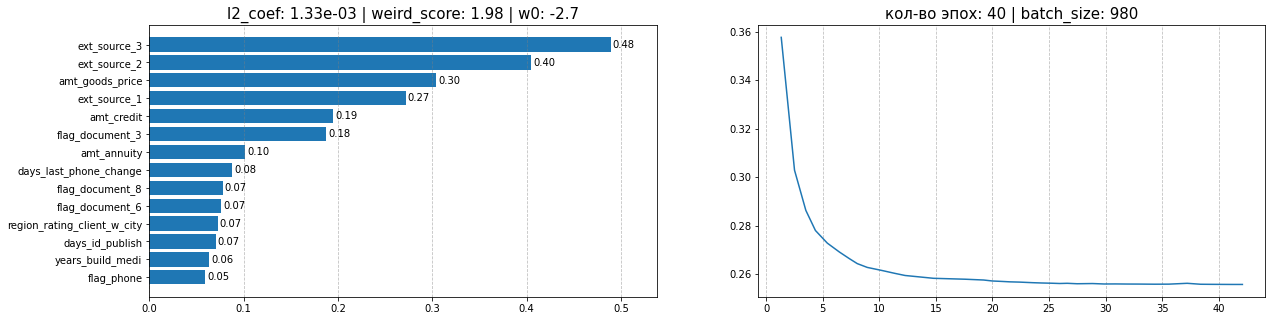

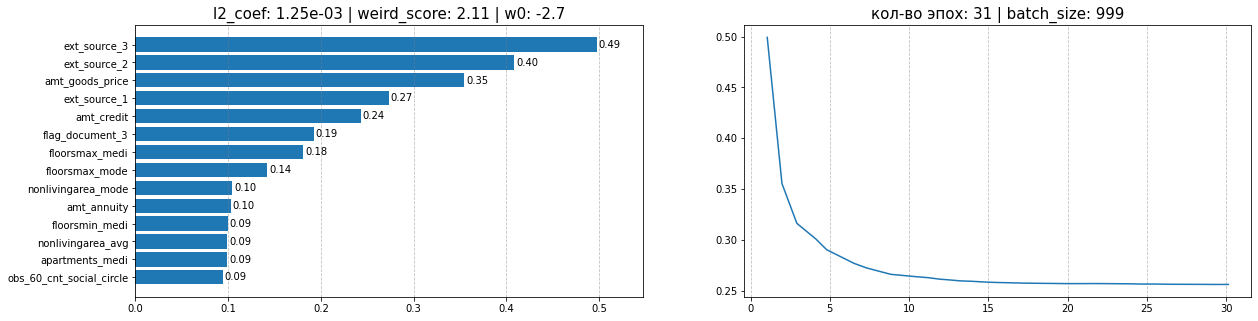

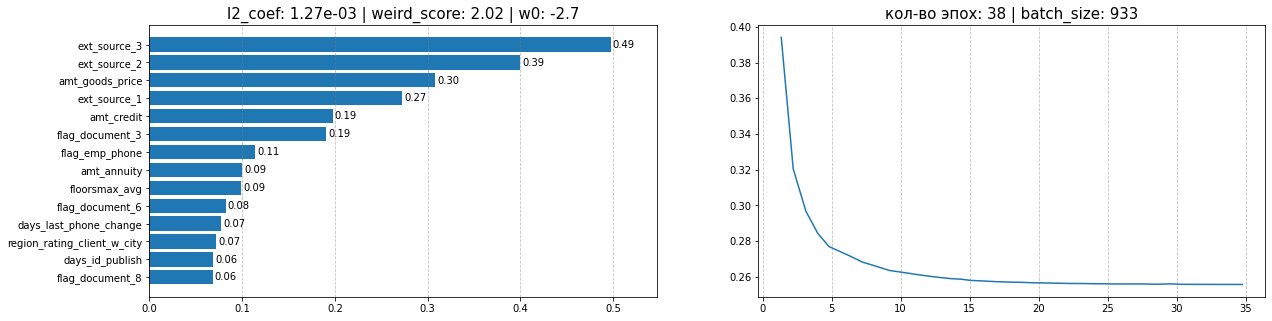

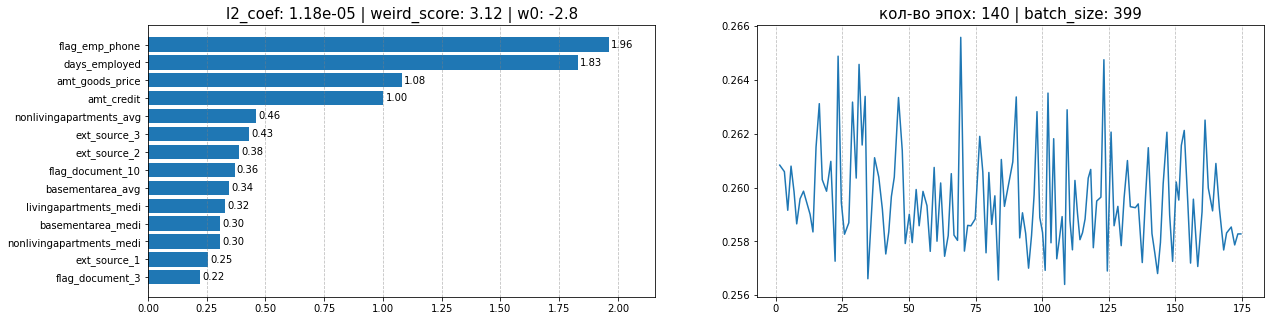

In [125]:
import matplotlib.pyplot as plt

# странные фичи с числами, сделаем из этого метрику для отбора trial
WEIRD_FEATURES_IDX = [i for i in range(len(FEATURES)) if sum([True for j in range(len(FEATURES)) if str(j) in FEATURES[i]])]

def plot_trial_info(trial, models, history, top_k, *your_args, **your_kwargs):
  # bars
  absWeights = abs(models[trial.number].w[1:])
  order_k = (-absWeights).argsort()[:top_k]
  k_features = FEATURES[order_k]
  fig, ax = plt.subplots(1,2,figsize=(20, 5))
  bars = ax[0].barh(k_features[::-1], absWeights[order_k][::-1], align='center', )
  ax[0].bar_label(bars, map(lambda x: str(x)[:4], absWeights[order_k][::-1]), padding=2)
  ax[0].set_xlim([0, absWeights[order_k][0]*1.1])
  ax[0].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5)
  
  # count sum of abs weights corresponding to WEIRD_FEATURES_IDX:
  weird_score = sum(absWeights[WEIRD_FEATURES_IDX])
  ax[0].set_title(f'l2_coef: {trial.params["l2_coef"]:.2e} | weird_score: {weird_score:.2f} | w0: {models[trial.number].w[0]:.1f}', fontsize=15)

  # history
  ax[1].plot(np.cumsum(history[trial.number]['time']), history[trial.number]['func'])
  ax[1].set_title(f'кол-во эпох: {len(history[trial.number]["time"])} | batch_size: {trial.params["batch_size"]}', fontsize=15)
  ax[1].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5)
  plt.show()

top_k = 14
for trial in top_trials:
    plot_trial_info(trial, models=models, history=history, top_k=top_k)

Опишите свои наблюдения. Если нужно, подключите визуализацию.

- "плохой" пример действительно оказался плохим, несмотря на то, что он дает самые большие веса более интуитивным признакам (а не этим подозрительным "ext_source_i")
- первые же три trials выглядят слишком похоже, чтобы сделать какое-либо значимое заключение, тем не менее, первый trial имеет наименьший weird_score, поэтому его и выберу

Какой в итоге коэффициент l2-регуляризации будем фиксировать для дальнейших экспериментов? <br>
Ответ объясните.

In [122]:
from optuna.importance import MeanDecreaseImpurityImportanceEvaluator
optuna.importance.get_param_importances(study, evaluator=MeanDecreaseImpurityImportanceEvaluator())

{'l2_coef': 0.763652809875841,
 'step_alpha': 0.1860015393634015,
 'batch_size': 0.026673780817514,
 'step_beta': 0.023671869943243527}

- несмотря на то, что оптимальный l2_coef очень близок к нулю, он все же имеет наибольший вес в optuna.importance
- раз уж я выбрал best_trial с l2_coef = 1.33e-3, то его и возьму, тк это значение не сильно меняется среди лучших trials

In [285]:
l2_coef=1.33e-3 #*! насколько вообще ок что он настолько мал? sum(weights)>4, то есть L2 практически не работает!

### Часть вторая. Research

Давайте зафиксируем выбранный коэффициент регуляризации и проведем несколько экспериментов с `step_alpha, step_beta, batch_size`. Но для начала посмотрим - возможно, нам удастся уменьшить размер признакового пространства без сильной потери качества, чтобы ускорить наши эксперименты.

Достаньте из словаря модель, соответствующую выбранному вами лучшему trial, и нарисуйте график отсортированных модулей ее весов.

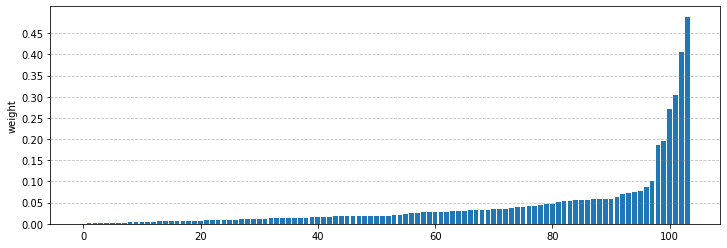

In [150]:
model = models[trials[0].number]
weights = sorted(abs(model.w[1:]))
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(range(len(weights)), weights)
ax.set_yticks(np.arange(0, max(weights), .05))
ax.set_ylabel('weight')
ax.yaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5);

Подумайте, можно ли убрать какую-то долю признаков? Если да, то какие признаки вы уберете для дальнейших экспериментов? <br>
Ответ объясните.

- в первом приближении (тк это результат линейной модели) стоит оставить признаки, чей abs(вес)>0.1, но проблема в том, что так можно обрубить хорошие признаки, от которых objective может зависеть нелинейно
- поэтому на всякий случай оставим все что выше abs(вес)>0.05

In [154]:
NEW_FEATURES = FEATURES[abs(model.w[1:])>0.05]

Напишите новую функцию `research_objective` для перебора `step_alpha, step_beta` при фиксированных `l2_coef, batch_size`. Остальные гиперпараметры оставьте без изменений с прошлого раза. Для перебора step_alpha используйте log-шкалу от 1e-3 до 20, для перебора step_beta - log-шкалу от 0.1 до 5.

Для `batch_size = 300, 1000, 10000` запустите по сессии оптимизации на выбранном вами множестве признаков, собирая каждый `study` в словарик по ключу batch_size. Используйте `n_trials = 200`, TPESampler с параметром `n_startup_trials = 100`.<br>

In [155]:
def research_objective(trial, batch_size, l2_coef, X_tr, y_tr, X_val, y_val):
  params = {
    'step_alpha': trial.suggest_float('step_alpha', 1e-3, 20, log=True, step=None),
    'step_beta' : trial.suggest_float('step_beta', .1, 5, log=True, step=None),
    'max_iter': 30,
    'tolerance': 2e-4,
    'loss_function': BinaryLogisticLoss(l2_coef),
    'batch_size': batch_size,
    'random_seed': 911
  }
  model = LinearModel(**params)
  model.fit(X_tr, y_tr)  
  return BinaryLogisticLoss(l2_coef=0).func(X_val, y_val, model.w)

Используя `optuna.visualization.plot_contour`, нарисуйте график зависимости `step_alpha - step_beta - objective`. Используйте аргумент `target`, чтобы обрезать значения лоссов, которые портят тепловую карту. <br>
Для каждого `batch_size` выведите такой график в отдельной ячейке.

In [163]:
from tqdm import tqdm
optuna.logging.set_verbosity(optuna.logging.WARNING)

batch_sizes = [300, 1000, 10000]
research_features = NEW_FEATURES

X_tr = prep.fit_transform(data_dict['tr'][research_features])
y_tr = data_dict['tr']['target']
X_val = prep.transform(data_dict['val'][research_features])
y_val = data_dict['val']['target']

studies = dict()
for batch_size in tqdm(batch_sizes):
  studies[batch_size] = optuna.create_study(direction='minimize', sampler=TPESampler(n_startup_trials=100))
  research_func = partial(research_objective, batch_size=batch_size, l2_coef=l2_coef, X_tr=X_tr, X_val=X_val, y_tr=y_tr, y_val=y_val)
  studies[batch_size].optimize(research_func, n_trials=200, n_jobs=1)

100%|██████████| 3/3 [37:52<00:00, 757.64s/it] 


In [234]:
# в цикле for plot_contour не рисует ничего!!! поэтому вот так вот
def my_clipper(trial: optuna.trial.FrozenTrial):
  return min(2.6, trial.value)

batch_size = batch_sizes[0]
print(f"batch_size: {batch_size}, optimal_alpha: {studies[batch_size].best_params['step_alpha']:.2f}, optimal_beta: {studies[batch_size].best_params['step_beta']:.2f}")
optuna.visualization.plot_contour(studies[batch_size], params=['step_alpha', 'step_beta'], target=my_clipper, target_name='loss')

batch_size: 300, optimal_alpha: 0.67, optimal_beta: 4.03


In [232]:
batch_size = batch_sizes[1]
print(f"batch_size: {batch_size}, optimal_alpha: {studies[batch_size].best_params['step_alpha']:.2f}, optimal_beta: {studies[batch_size].best_params['step_beta']:.2f}")
optuna.visualization.plot_contour(studies[batch_size], params=['step_alpha', 'step_beta'], target=my_clipper, target_name='loss')

batch_size: 1000, optimal_alpha: 0.76, optimal_beta: 1.06


In [233]:
batch_size = batch_sizes[2]
print(f"batch_size: {batch_size}, optimal_alpha: {studies[batch_size].best_params['step_alpha']:.2f}, optimal_beta: {studies[batch_size].best_params['step_beta']:.2f}")
optuna.visualization.plot_contour(studies[batch_size], params=['step_alpha', 'step_beta'], target=my_clipper, target_name='loss')

batch_size: 10000, optimal_alpha: 1.45, optimal_beta: 0.18


Опишите свои наблюдения.

- в каждом случае оптимальные alpha, beta лежат в трубе вокруг одинаковой прямой пересекающей точки (1,0.1) и (10,4)
- при этом более стабильные параметры при малом batch_size скоплены ближе к большему step_beta (10,4), когда при большом batch_size ближе к малому (1,0.1)
- по идее должно было полочиться что-то типа при малом batch_size меньший шаг, ну и в общем-то при наибольшем **стабильном** step_beta первый шаг - 10, в то время как у малого шаг ~1
- брать best_params не хочу, тк они 1) одинаковые для всех batch_sizes 2) лучше брать стабильные оптимальные=>

In [239]:
d = {
  batch_sizes[0]: (12.65, 4.27),
  batch_sizes[1]: (14.87, 4.26),
  batch_sizes[2]: (1, 0.14),
}
alphas_betas = {i:{'step_alpha': d[i][0], 'step_beta': d[i][1]} for i in d}
# спойлер: это не изменило НИЧЕГО, можно использовать просто studies[batch_size].best_params

Обучите по модели для каждого `batch_size` с лучшими `step_alpha, step_beta`. Соберите историю, сложите все в словари по ключу batch_size.

In [270]:
params = {'max_iter':30,'tolerance':2e-4,'loss_function':BinaryLogisticLoss(l2_coef),'random_seed':911}

models, history = dict(), dict()
for batch_size in batch_sizes:
  model = LinearModel(batch_size=batch_size, **alphas_betas[batch_size], **params)
  history_ = model.fit(X_tr, y_tr, trace=True)
  models[batch_size] = model
  history[batch_size] = history_

Визуализируйте результаты эксперимента. Нарисуйте графики `time-loss`, `epoch-loss`, `epoch-learning_rate`. <br>
На графике `epoch-loss` должно быть каким-либо образом отображено среднее время эпохи для каждого размера батча. <br>
Под `learning_rate` имеется в виду:
$$\eta_k  = \frac{\alpha}{k^{\beta}}, \quad \text{где $k$ - номер итерации (эпохи)}$$

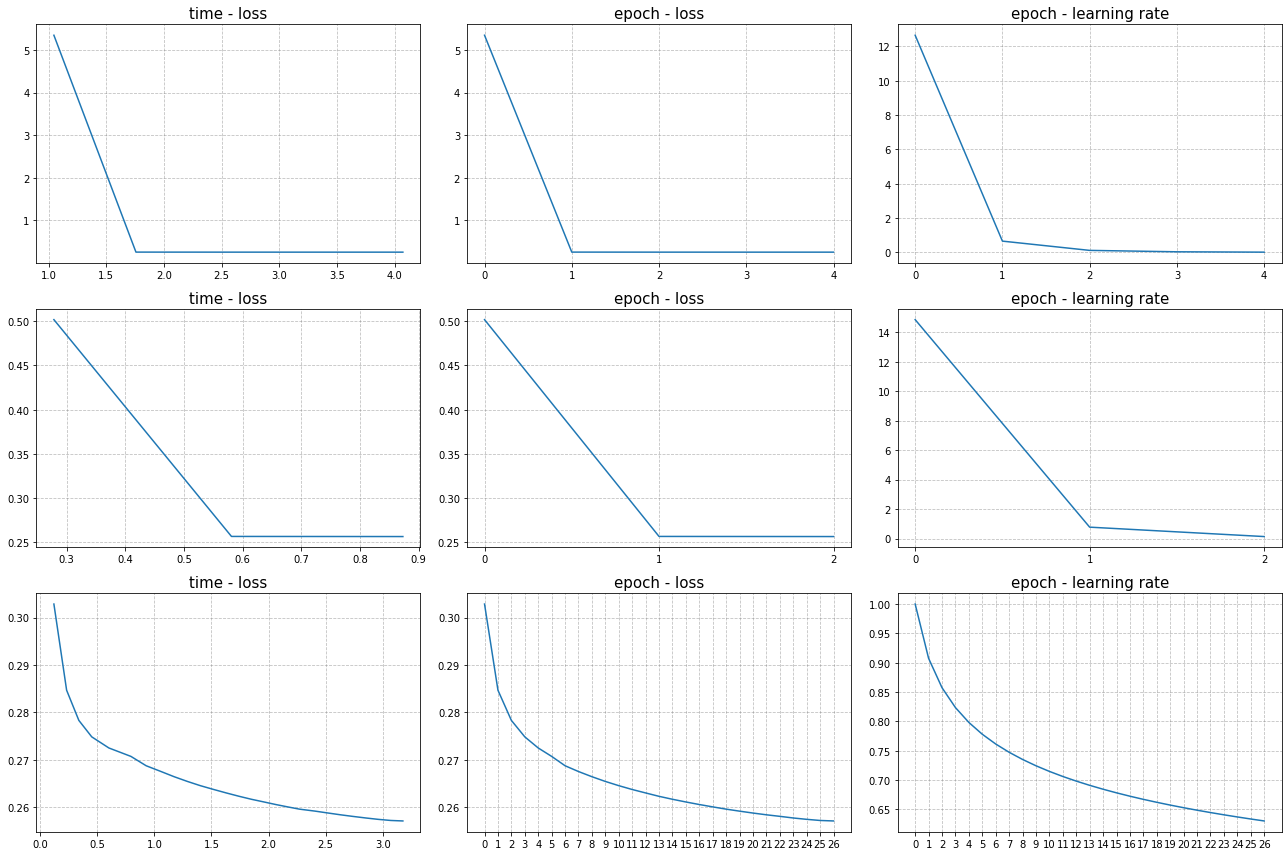

In [271]:
fig, ax = plt.subplots(3,3,figsize=(18, 12))
for i, batch_size in enumerate(batch_sizes):
  ax[i,0].plot(np.cumsum(history[batch_size]['time']), history[batch_size]['func'])
  ax[i,0].set_title(f'time - loss', fontsize=15)
  ax[i,0].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5)
  ax[i,0].yaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

  ax[i,1].plot(range(len(history[batch_size]['func'])), history[batch_size]['func'])
  ax[i,1].set_title(f'epoch - loss', fontsize=15)
  ax[i,1].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5)
  ax[i,1].yaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5)
  ax[i,1].set_xticks(range(len(history[batch_size]['func'])))

  a, b = models[batch_size].step_alpha, models[batch_size].step_beta
  lr   = a/np.arange(1, len(history[batch_size]['func'])+1)**b
  ax[i,2].plot(range(len(history[batch_size]['func'])), lr)
  ax[i,2].set_title(f'epoch - learning rate', fontsize=15)
  ax[i,2].xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5)
  ax[i,2].yaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.5)
  ax[i,2].set_xticks(range(len(history[batch_size]['func'])))

fig.tight_layout()

In [282]:
from sklearn.metrics import roc_auc_score
X_tst = prep.transform(data_dict['tst'][research_features])
y_tst = data_dict['tst']['target']+1
for batch_size in batch_sizes:
  auc = roc_auc_score(y_tst, models[batch_size].predict_proba(X_tst))
  print(f'batch_size: {batch_size}, AUC: {auc:.3f}')

batch_size: 300, AUC: 0.729
batch_size: 1000, AUC: 0.729
batch_size: 10000, AUC: 0.726


Какие выводы можно сделать из увиденного?

- для маленьких батчей сошлось практически за 1 эпоху, в десять раз быстрее чем для большого батча, при этом проигрыш в качестве несущественный
- складывается ощущение, что оптимальная модель для этих данных проста, тк ей хватает всего ~300 строк датасета (оптимальный batch_size) чтобы корректно сделать шаг спуска

У нас получился пайплайн обучения модели на исходном наборе данных. Какие еще параметры этого пайплайна можно оптимизировать?

- попробовать другие функции потерь, другие метрики качества
- если это линейная модель, то наверное стоит позаботиться об отсутствии корреляции признаков
- изучить стабильность: если мы нашли какие-то best_parameters, то при других сидах они должны не сильно отличаться
- улучшить feature importance и feature selection techniques, так как представленные здесь годились лишь в линейном приближении.